In [1]:
# improt packages
import pandas as pd
import pprint
import tableprint as tp
import itertools as it
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pylab as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

font0 = FontProperties()
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline'}
# Show family options

families = ['serif', 'sans-serif', 'cursive', 'fantasy', 'monospace']

font1 = font0.copy()
font1.set_size('large')
plt.style.use('ggplot')
pp = pprint.PrettyPrinter(indent=4)

# mpld3.enable_notebook()

%matplotlib inline

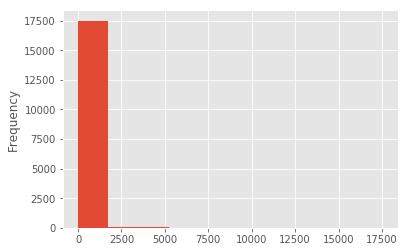

In [14]:
df_pred = pd.read_csv('../workdir/submission.csv')
df_pred[df_pred.prediction_pay_price>1]['prediction_pay_price'].plot.hist()

In [15]:
df_pred[df_test.prediction_pay_price>1]['prediction_pay_price'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: prediction_pay_price, dtype: float64

In [13]:
df_test = pd.read_parquet('../data/tap_fun_test.parquet')
df_test=df_test.reset_index(drop=True)

In [18]:
df_pred.head()


,user_id,prediction_pay_price
0,14933,0.000000e+00
1,14934,1.164674e-16
2,14935,0.000000e+00
3,14936,1.164674e-16
4,14937,1.164674e-16


In [21]:
df_test = pd.merge(df_test,df_pred, on ='user_id')


In [24]:
df_test[(df_pred.prediction_pay_price>1) & (df_test.avg_online_minutes<3)].describe()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,acceleration_army_cross_ratio,bd_sr_product,bd_sr_ratio,acceleration_per_hour,sr_level_score_per_hour,army_reduce_per_battle,sr_army_prod,army_per_hour,bd_resource_ratio,prediction_pay_price_y
count,1.720000e+02,1.720000e+02,1.720000e+02,172.0,1.720000e+02,1.720000e+02,172.000000,172.00,1.720000e+02,172.00,...,172.000000,172.000000,172.000000,172.000000,172.0,172.000000,172.0,172.000000,1.720000e+02,172.000000
mean,1.746636e+06,1.635947e+06,9.165911e+05,851984.0,1.239904e+05,4.649434e+05,134.848831,2691814.75,9.612718e+05,3450122.50,...,18.863588,7.924419,10.419379,2.697649,0.0,83.609909,0.0,0.533782,6.310314e+05,3.733491
std,8.390532e+05,7.067086e+06,7.020466e+06,1049235.5,5.944666e+05,5.317509e+05,1768.525879,4407488.00,4.309346e+06,10809313.00,...,138.485321,17.618441,8.781797,8.647509,0.0,187.800308,0.0,1.083939,2.223217e+06,9.330707
min,1.510200e+04,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.00,0.000000e+00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000e+00,1.002508
25%,1.197402e+06,2.509415e+05,1.756175e+04,21600.0,0.000000e+00,0.000000e+00,0.000000,238143.00,1.103650e+04,0.00,...,0.000000,0.000000,5.500000,0.000000,0.0,0.000000,0.0,0.000000,3.717949e+03,1.025421
50%,1.998110e+06,1.080936e+06,7.375250e+04,1000000.0,0.000000e+00,5.000000e+05,0.000000,2352046.00,4.565000e+04,5164.50,...,0.000000,0.000000,9.000000,0.275877,0.0,0.000000,0.0,0.000000,1.042832e+04,1.038733
75%,2.453490e+06,1.414114e+06,2.278468e+05,1013238.5,0.000000e+00,5.000000e+05,0.000000,3105791.50,1.642305e+05,81578.25,...,0.074768,11.000000,13.000000,1.985435,0.0,200.000000,0.0,1.000000,1.232916e+05,1.990077
max,3.135386e+06,9.250925e+07,9.176366e+07,11207154.0,6.537048e+06,3.530460e+06,23194.000000,47880424.00,4.772528e+07,70101784.00,...,1625.000000,96.000000,49.000000,101.775024,0.0,2105.000000,0.0,9.568181,1.935986e+07,110.426548
